<img src="https://raw.githubusercontent.com/hwhitt/DSGT-Workshop-Content/master/images/logo.png" width="100"/>

# DSGT Bootcamp Week 3: Introductory Data Preprocessing

## Learning Objectives  

1) Have a basic idea of what machine learning fundamentally 

3)  Learn three Ways to Conceptualize Models and Data  

4)  Understand the Difference Between Classification and Regression  

 
5)  Be able to pre-process data (eg: missing value, imputation, feature engineering, feature removal)

<img src="https://media.istockphoto.com/vectors/machine-learning-3-step-infographic-artificial-intelligence-machine-vector-id962219860?k=6&m=962219860&s=612x612&w=0&h=yricYyUqZbILMHp3IvtenS3xbRDhu1w1u5kk2az5tbo=" width="400"/>  
(Double click this block for image credit) 


# Accessing the Titanic Dataset

#### To speed up the data download process, we've placed the data in this Google Folder where everyone will be making their notebooks. Let's go over the steps needed to import data into Google Colab.

**PLEASE READ THE STEPS!!!**
1. Go to your Google Drive (drive.google.com) and check **"Shared with me"**
2. Search for a folder named **"Spring 2021 Bootcamp Material"**
3. Enter the **Spring 2021 Bootcamp Material** folder, click the name of the folder (**Spring 2021 Bootcamp Material**) on the bar at the top of the folder to create a drop-down and select **"Add shortcut to Drive"**
4. Select **"My Drive"** and hit **"Add Shortcut"**
5. Enter the **Spring 2021 Bootcamp Material** folder you just made, and navigate to the **"Participants"** subfolder
6. Make a new folder within Participants in the format **"FirstName LastName"**.
7. Return to Google Colab.
8. Go to **"File -> Save a copy in Drive"**. Rename the file to **"firstname-lastname-week3.ipynb"**. It will be placed into a folder named **"Colab Notebooks"** in your Google Drive.
9. Move **"firstname-lastname-week3.ipynb"** to your **Participant** folder within Google Drive.
10. Return to Google Colab.
11. Hit the folder image on the left bar to expand the file system.
12. Hit **"Mount Drive"** to allow Colab to access your files. Click the link and copy the code provided into the textbox and hit Enter.

## Setup  
First we will mount the drive. Then we will read in our dataset. We will be using pandas again! 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now, make a shortcut in your drive to this folder: https://drive.google.com/drive/u/0/folders/1NgkOu13uT-a7AhXu8bOZH4gYlhjaeL0- .
This will allow us to access our data. Click on the folder name, then click add shortcut to drive.

In [2]:
%cd 'drive/My Drive/Spring 2021 Bootcamp Material/Participants/Data'

/content/drive/.shortcut-targets-by-id/14ismWEVuvc7ESkob1ObgVgyn9LoOSa3h/Spring 2021 Bootcamp Material/Participants/Data


In [3]:
%ls

 cleanTitanic.csv              'cleanTitanic_train (6).csv'
'cleanTitanic_train (10).csv'  'cleanTitanic_train (7).csv'
'cleanTitanic_train (11).csv'  'cleanTitanic_train (8).csv'
'cleanTitanic_train (12).csv'  'cleanTitanic_train (9).csv'
'cleanTitanic_train (1).csv'    cleanTitanic_train.csv
'cleanTitanic_train (2).csv'    cleanWIC.csv
'cleanTitanic_train (3).csv'    titanic_test.csv
'cleanTitanic_train (4).csv'    titanic_train.csv
'cleanTitanic_train (5).csv'    WICData.csv


In [4]:
import pandas as pd
import numpy as np

import warnings # filtering out messy warning messages
warnings.filterwarnings("ignore")

### What is machine learning?
Machine Learning is the process of **turning data into actionable knowledge** for **task support** and **decision making**.

 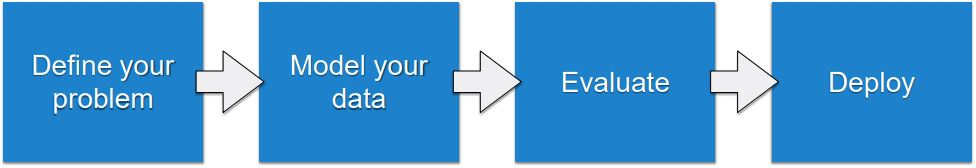


<h1>Unsupervised learning for data exploration</h1>
<ul><li>Clustering analysis, dimensionality reduction, kernel density estimation</li></ul>
<h1>Supervised learning for predictive analysis</h1>
<ul><li>Tree-based models, linear classification/regression, neural networks</li></ul>

### There are 3 main ways to consider ML models. 
1) Pictorially  
2) Using decision boundaries  
3) Mathematically    
Let's walk through each of them 

## 1) Pictorially
#### Optional Pre-test: Can you guess which picture corresponds to which algorithm?
a) Neural Network b) Decision Tree c) Support Vector Machine (SVM)  

 
<img src="https://raw.githubusercontent.com/hwhitt/DSGT-Workshop-Content/master/images/Screen%20Shot%202020-06-20%20at%204.47.51%20PM.png"  height='200'>


<!--  
<img src="https://drive.google.com/uc?id=1OVtVVcwWkF0disA33iQE4MxwlaAvVnfu"  height='200'> -->


## 2) Decision Boundaries  
**Note: Don't worry about the code in this section! All will be explained later in the notebook. Focus on the visualizations**
####  Now we can plot decision boundaries  
Decision boundaries can intuitively be thought of how an ML model is making decisions.    
These boundaries will determine which class a given instance belongs to.   
We can see below how a decision boundary is differentiating between the two classes -- let's say Class Dog and Class Cat  


<!-- <img src="https://drive.google.com/uc?id=1qmwspJdtAuU7c5rA3dtljXNm-Ni7-Jk2"  height='200'> -->
<img src="https://raw.githubusercontent.com/hwhitt/DSGT-Workshop-Content/master/images/Screen%20Shot%202020-06-20%20at%204.56.48%20PM.png"  height='200'>


Some models you can use are decision tree, a KNN, an SVM, and a simple neural network   
These are all very popular algorithms in industry and in academia!

### 3) Mathematic Formulations    
Think: What is a model that is using features to predict a class doing?  
You are taking in as INPUT the columns. You are getting as OUTPUT a classification   
Thus, you are finding a MAPPING between the INPUT and the OUTPUT  

f: X → Y   
f(x) = y

 
<img src="https://raw.githubusercontent.com/hwhitt/DSGT-Workshop-Content/master/images/Screen%20Shot%202020-05-16%20at%205.33.50%20PM.png" height='300'>


#### Let's focus on a regression model. Now we can look at the mathematical formula  
Intuition : linear regression looks something like this: y=mx+b      
    
<img src="https://raw.githubusercontent.com/hwhitt/DSGT-Workshop-Content/master/images/Screen%20Shot%202020-06-20%20at%204.51.22%20PM.png" height='300'>

The goal of ML is to adjust the PARAMETERS to OPTIMIZE performance 

**Question:** we can fit a linear regression model to our data.   
If there is more than one feature, y= mx+b is not enough. We need a more complex formulation  
What could a possible formulation be?

## Classification vs Regression 
Can you state the difference between classification and regression?  
Which has a discrete and which has a continuous output?


<img src="https://raw.githubusercontent.com/hwhitt/DSGT-Workshop-Content/master/images/Screen%20Shot%202020-06-20%20at%204.48.26%20PM.png" height='300'>


## Why do we need data preprocessing? 

When you recieve data, there can be a lot to fix.  
Potential issues include:   
1) Flaws in the data itself (ex poor formatting or missing values)     
2) Information could still be added (maybe creating your own features?)  
3) Some data may be redundant or straight up not be useful 

<img src="https://miro.medium.com/max/1200/1*K6ctE0RZme0cqMtknrxq8A.png" width="350">

# Missing Values & Value Imputation

<img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/03/How-to-Handle-Missing-Values-with-Python.jpg" width="300px">

How would you handle missing values? Many algorithms will not run with NaNs or missing values.   

\\
One approach may be to delete all rows with missing values.   
An example is removing all users with a missing field, such as age. However, you could lose a lot of data this way    

\\
**Value Imputation** is an intelligent way of filling  in missing values. The following exercise walks through deleting random values from a few columns and then fixing them using a few different types of imputation. 

In [5]:
df = pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [22]:
# Creating a new dataframe with a subset of columns from the original
mini_df = df[['PassengerId', 'Age', 'Fare']] # Recap: what are we doing here? 
mini_df


,PassengerId,Age,Fare
0,1,22.0,7.2500
1,2,38.0,71.2833
2,3,32.5,7.9250
3,4,35.0,53.1000
4,5,35.0,8.0500
...,...,...,...
886,887,27.0,13.0000
887,888,19.0,30.0000
888,889,NaN,23.4500
889,890,26.0,30.0000


In [23]:
# Generating missing values -- used for the purpose of the exercise
# Not critical to understand or reproduce!

# remove 20% of data from the features
np.random.seed(1)

mini_df['PassengerId'] = \
    mini_df['PassengerId'].mask(np.random.random(mini_df['PassengerId'].shape) < .2)

mini_df['Age'] = \
    mini_df['Age'].mask(np.random.random(mini_df['Age'].shape) < .2)

mini_df['Fare'] = \
    mini_df['Fare'].mask(np.random.random(mini_df['Fare'].shape) < .2)
mini_df

,PassengerId,Age,Fare
0,1.0,22.0,7.2500
1,2.0,38.0,71.2833
2,NaN,32.5,7.9250
3,4.0,35.0,53.1000
4,NaN,35.0,8.0500
...,...,...,...
886,887.0,27.0,13.0000
887,NaN,19.0,30.0000
888,889.0,NaN,23.4500
889,890.0,26.0,30.0000


What changes were made?

In [24]:
mini_df.isnull()

,PassengerId,Age,Fare
0,False,False,False
1,False,False,False
2,True,False,False
3,False,False,False
4,True,False,False
...,...,...,...
886,False,False,False
887,True,False,False
888,False,True,False
889,False,False,False


In [28]:
mini_df.isnull().sum(axis = 0) 
# Question? Any guesses as to what axis=0 means? 

PassengerId    181
Age            319
Fare           178
dtype: int64

## Types of Imputation
- Fixed values (all 0s)  
- Measures of central tendency (the mean, median, mode of existing entries) 
- Backfilling (filling with the prior existing value)

<img src="https://raw.githubusercontent.com/hwhitt/DSGT-Workshop-Content/master/images/nan.png" width="600"/>

In [10]:
# An example of fixed-value imputation
mini_df['PassengerId'].fillna('N', inplace=True) # what does inplace=True mean?

mini_df.isnull().sum(axis=0) 

PassengerId      0
Age            319
Fare           178
dtype: int64

In [11]:
# An example of mean-imputaiton
mini_df['Age'].fillna(mini_df['Age'].mean(), inplace=True)

# An example of backfill-imputation
mini_df['Fare'].fillna(method="backfill", inplace=True)

mini_df

,PassengerId,Age,Fare
0,1,22.000000,7.2500
1,2,38.000000,71.2833
2,N,26.000000,7.9250
3,4,35.000000,53.1000
4,N,35.000000,8.0500
...,...,...,...
886,887,27.000000,13.0000
887,N,19.000000,30.0000
888,889,29.634038,23.4500
889,890,26.000000,30.0000


Discussion: In what cases would you use each approach? 

# Feature Creation and Manipulation
We can make features (or columns) from scratch. We can also derive them from existing columns  
We can consider feature engineering here as accessing rows and columns of the dataframe

### Editing with Rows

In [30]:
# Let's start by viewing the head of the dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_Column_Chosen_Value,New_Column_Random_Value,MoreExpensiveFare,isAffordable,Age Weighted Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0.327594,8.2500,1,159.5000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0.327594,72.2833,0,2708.7654
2,3,1,3,"Heikkinen, Miss. Laina",female,32.5,0,0,STON/O2. 3101282,7.9250,NaN,S,2,0.327594,8.9250,1,257.5625
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0.327594,54.1000,0,1858.5000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,0.327594,9.0500,0,281.7500


In [13]:
# Recap: Who remembers what 0 indexing means? 
df.iloc[2] # This returns a single row, called a series

# What row of the dataframe does this return?

PassengerId                         3
Survived                            1
Pclass                              3
Name           Heikkinen, Miss. Laina
Sex                            female
Age                                26
SibSp                               0
Parch                               0
Ticket               STON/O2. 3101282
Fare                            7.925
Cabin                             NaN
Embarked                            S
Name: 2, dtype: object

In [31]:
# We can chain .iloc with filtering to pick a value at a specific row and column
df.iloc[2]['Age']

32.5

In [32]:
# We can also use the assignment operator to change the value in an area
# *= is a special variant that multiples the existing value by whatever is on
# the right side of the operator
df.at[2,'Age'] *=  1.25 
df.at[2,'Age']


40.625

Can you  figure out the value of Fare for the 10th row?

### Editing with Columns

Creating columns is a big part of feature engineering. You can create a column with a chosen value, with a random value, or by changing values of other columns

In [16]:
# creating a column
df['New_Column_Chosen_Value'] = 2 # we can choose one constant value
df['New_Column_Random_Value'] = np.random.rand() # we can randomly generate a value
df['MoreExpensiveFare'] = df['Fare'] + 1  # we can manipulate old columns

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_Column_Chosen_Value,New_Column_Random_Value,MoreExpensiveFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0.327594,8.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0.327594,72.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,32.5,0,0,STON/O2. 3101282,7.9250,NaN,S,2,0.327594,8.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0.327594,54.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,0.327594,9.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,2,0.327594,14.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,2,0.327594,31.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,2,0.327594,24.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,2,0.327594,31.0000


## Feature Creation Using the "where" Syntax  
Think of this as a conditional statement: "Make a change **where** condition"  
For example, we can make a binary feature. 
We will create feature isLargeLot. You have a large lot **where** large lot > 9500

In [17]:
df['isAffordable'] = 1
df['isAffordable'].where(df["Fare"] < 8, 0, inplace=True) #The zero parameter is the else value. 
                                                          #We are inserting a 0 where condition is met
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_Column_Chosen_Value,New_Column_Random_Value,MoreExpensiveFare,isAffordable
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0.327594,8.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0.327594,72.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",female,32.5,0,0,STON/O2. 3101282,7.9250,NaN,S,2,0.327594,8.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0.327594,54.1000,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,0.327594,9.0500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,2,0.327594,14.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,2,0.327594,31.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,2,0.327594,24.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,2,0.327594,31.0000,0


In [18]:
# try to create a mini dataframe containing only where Age == 22

#        answer: my_df = df[df['Age'] == 22] 
#my_df

We can also derive features from other features. For example, lets make a product

In [19]:
df['Age Weighted Fare'] = df['Age']*df['Fare'] 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_Column_Chosen_Value,New_Column_Random_Value,MoreExpensiveFare,isAffordable,Age Weighted Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0.327594,8.2500,1,159.5000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0.327594,72.2833,0,2708.7654
2,3,1,3,"Heikkinen, Miss. Laina",female,32.5,0,0,STON/O2. 3101282,7.9250,NaN,S,2,0.327594,8.9250,1,257.5625
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0.327594,54.1000,0,1858.5000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,0.327594,9.0500,0,281.7500


In [20]:
# try incrementing all values in the "Age" by 1
 
# answer  df['Age'] + 1

## Non-Useful Data
Another data flaw can be that non-useful data may be included.  
Why is this a problem?      
- You don't get useful information 
- Information overload can cloud analysis  
- Extra information can increase dataset size
- Extra information can increase computational overhead   

<img src="https://raw.githubusercontent.com/hwhitt/DSGT-Workshop-Content/master/images/cube.png" width="500"/>  









In [21]:
# dropping columns is easy  
# we will drop all of the columns we made 
my_df.drop(columns=['isAffordable'], axis=1, inplace=True)
my_df.drop(columns=['New_Column_Chosen_Value', 'New_Column_Random_Value', 'MoreExpensiveFare'], axis=1, inplace=True)
my_df.head()

NameError: ignored

# Feature manipultion: Words vs Numbers  
Intuition: A machine does a great job of interpreting *numbers*. People are able to interpret the symantics and meanings of words, yet your computer cannot.   

Fact: You will need to make sure that your features are **discrete** or **continuous** numerical values -- not **categorical**   

Let's take a look at the Sale Condition column. And at the Lot Shape, Street, and MSZoning

In [ ]:
df[['Name', 'Sex', 'Cabin']]

In [ ]:
print(df.Name.unique())
print(df.Sex.unique())
print(df.Cabin.unique())

There are two popular ways of encoding these values. 
One is to match each feature to a value. Ex. 'Reg' to 1, IR1 to 2.... Family to 6  
Another is to "one-hot-encode" -- or turn each feature into a set of binary features.  
Ex. normal: yes or no? Abnormal: 0 or 1. 
### Find and replace

In [ ]:
titanic = pd.read_csv('titanic_train.csv')
titanic.head()

In [ ]:
#distinct values for Embarked
titanic['Embarked'].unique()

In [ ]:
#fill nan in 'Embarked' column with 'Q'
titanic['Embarked'] = titanic['Embarked'].fillna('Q')
titanic['Embarked'].unique()

In [ ]:
# using a dictionary
cleanup_nums = {"Embarked":     {'S': 1, 'C': 2, 'Q':3}}
titanic.replace(cleanup_nums, inplace=True)
titanic.head()

In [ ]:
# using catcodes
# assigns a number to each unique entry
# guesses as to any concerns with this approach? 
titanic["Pclass"] = titanic["Pclass"].astype('category')
titanic["Pclass"] = titanic["Pclass"].cat.codes

titanic["SibSp"] = titanic["SibSp"].astype('category')
titanic["SibSp"] = titanic["SibSp"].cat.codes

titanic.head()

One-hot encoding. Binary yes or no. 
Note the Street_Grvl and Street_Pave Features

In [ ]:
# look at the result. Can you guess what happened? 
titanic = pd.get_dummies(titanic, columns=["Pclass", 'Sex', 'Cabin'])
titanic.head()

## Let's do a final cleanup. 
We will drop all features with remaining nans.  
We will also get rid of all   
(bad in practice but will save time here!)

In [ ]:
titanic.dropna(axis=1, how='any', inplace=True) #drop the columns
titanic

In [ ]:
titanic = titanic.select_dtypes(exclude=['object'])
titanic.head()

## Testing It Out: The effects of any data manipulation on misc. ML tasks  

For example, let's take a look at performance as we run feature selection using simple (one-variable) linear regression 

<img src="https://raw.githubusercontent.com/hwhitt/DSGT-Workshop-Content/master/images/reg.png" width="400"/>


We can also choose to run multiple linear regression on any of the features we want. Let's select only useful features, a process known as **feature selection**  

<img src="https://raw.githubusercontent.com/hwhitt/DSGT-Workshop-Content/master/images/features.png" width="690"/>

So, what do we have to work with?

In [ ]:
df.columns

# Dimensionality Reduction Exercise

#### What if we have a dataset with millions of features? What do we do? How can we reduce the dimensionality?  

In [ ]:
#As you can see in the above dataset, we have approximately 160 columns. Let's reduce this dimensionality by selecting a few columns

dim_reduced = titanic[["PassengerId", "Survived", "SibSp", "Parch", "Fare", "Embarked", "Pclass_0", "Pclass_1", "Pclass_2", "Sex_female", "Sex_male"]]
dim_reduced.head()